## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [71]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import datetime as dt
import requests
from collections import Counter

import os
API_key = os.environ.get('WWO_API_key')

In [2]:
params = {'user' : 'lhl_student',
          'password' : 'lhl_student',
          'host' : 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
          'port' : '5432',
          'database' : 'mid_term_project'
         }

def open_connection(params):
    try:
        connection = psycopg2.connect(**params)
        cursor = connection.cursor()
        print("Connection was successful")
    except psycopg2.Error as e:
        print(f"The following error '{e}' occurred.")
        
    return connection, cursor
open_connection(params)

Connection was successful


(<connection object at 0x000002CB76953A68; dsn: 'user=lhl_student password=xxx dbname=mid_term_project host=mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com port=5432', closed: 0>,
 <cursor object at 0x000002CB769EC048; closed: 0>)

In [3]:
connection, cursor = open_connection(params)

query1 = 'SELECT * FROM flights LIMIT 1500;'
query2 = "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'flights';"

cursor.execute(query1)
data = cursor.fetchall()

cursor.execute(query2)
columns = cursor.fetchall()

connection.close()

Connection was successful


In [4]:
columns = [col[0] for col in columns]
columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [5]:
df = pd.DataFrame(data, columns=columns)
df.dropna(subset=['arr_delay'], inplace=True)
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-03-20,AA,AA,AA,350,AA,N947NN,350,13930,ORD,...,733.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-03-20,AA,AA,AA,351,AA,N961AN,351,12953,LGA,...,1096.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-03-20,AA,AA,AA,352,AA,N928AN,352,13930,ORD,...,733.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-03-20,AA,AA,AA,354,AA,N844NN,354,14100,PHL,...,1013.0,0.0,0.0,22.0,0.0,0.0,None,NaN,NaN,None
4,2018-03-20,AA,AA,AA,356,AA,N155NN,356,12953,LGA,...,733.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2018-03-20,DL,DL,DL,1949,DL,N318NB,1949,14747,SEA,...,1721.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1496,2018-03-20,DL,DL,DL,1950,DL,N928DN,1950,14869,SLC,...,1481.0,48.0,0.0,0.0,0.0,0.0,724.0,32.0,32.0,None
1497,2018-03-20,DL,DL,DL,1952,DL,N937DL,1952,11423,DSM,...,743.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1498,2018-03-20,DL,DL,DL,1953,DL,N970DL,1953,10397,ATL,...,743.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [6]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [7]:
df['arr_delay'][df['arr_delay']> 150]

62      162.0
63      181.0
289     562.0
302     170.0
303     169.0
310     181.0
363     346.0
385     207.0
387     252.0
502     171.0
533     169.0
838     221.0
1024    376.0
1291    171.0
1349    162.0
1350    168.0
Name: arr_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

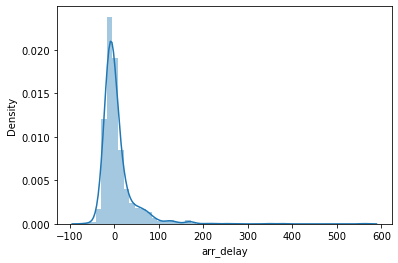

In [8]:
sns.distplot(df['arr_delay'])

In [9]:
stat,p = stats.shapiro(df['arr_delay'][df['arr_delay'] < 150])
stat, p

(0.8275378942489624, 2.235497314380543e-36)

In [10]:
stats.trim_mean(df['arr_delay'], 0.20)

-1.9224441833137484

### ^^^ The Distribution is not normal (without outliers)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [11]:
connection,cursor = open_connection(params)
print('working...')

months = [] # Will be a list of DataFrames!!       CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly
i='00'
for mon in range(1,13):
    if mon < 10:
        i = '0' + str(mon)  # need to format single digits from '1' -> '01'    This can be changed but i forget offhand the SQL wildcard CHar for any OR NONE characters
    else:
        i = str(mon)
    query = f'''
    SELECT * FROM flights 
    WHERE fl_date LIKE '____-{i}%'
    ORDER BY random()
    LIMIT 300;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    month.dropna(subset=['fl_date','dep_time'], inplace=True)
    months.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
working...
Connection closed, operation completed


In [12]:
months[0].head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-25,WN,WN,WN,1012,WN,N8529Z,1012,14107,PHX,...,647.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-01-30,DL,DL,DL,940,DL,N906DE,940,13303,MIA,...,594.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
2,2018-01-19,UA,UA_CODESHARE,UA,5836,OO,N783SK,5836,10372,ASE,...,737.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
3,2019-01-22,B6,B6,B6,225,B6,N952JB,225,12478,JFK,...,1005.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-01,DL,DL,DL,1424,DL,N816DN,1424,13204,MCO,...,957.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
5,2018-01-02,WN,WN,WN,6866,WN,N913WN,6866,13796,OAK,...,723.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
6,2018-01-23,DL,DL_CODESHARE,DL,3600,OO,N921EV,3600,11823,FWA,...,508.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
7,2018-01-15,UA,UA,UA,1037,UA,N820UA,1037,13930,ORD,...,612.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
8,2019-01-15,DL,DL_CODESHARE,DL,3287,9E,N604LR,3287,10397,ATL,...,457.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9,2019-01-27,WN,WN,WN,3450,WN,N928WN,3450,14747,SEA,...,672.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

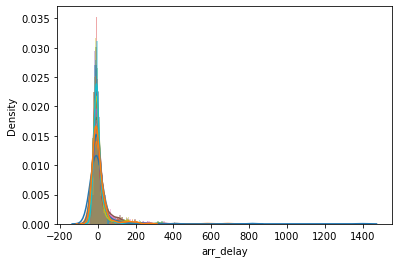

In [37]:
for month in months:
    sns.distplot(month['arr_delay'])

In [14]:
for i in range(12):
    print('month', i, 'mean:', stats.trim_mean(months[i]['arr_delay'], 0.20))  # trim_mean removes the N percent of either tails, in this case 20% to deal with outliers (then calculates mean)

print()  

for i in range(12):
    print('month', i, 'median', np.median(stats.trimboth(months[i]['arr_delay'], 0.20)))      # median must be called as np.median(data), so trim_both only performs a trim

month 0 mean: -7.777777777777778
month 1 mean: -4.88268156424581
month 2 mean: -4.385057471264368
month 3 mean: -6.264044943820225
month 4 mean: -4.508474576271187
month 5 mean: -0.17714285714285713
month 6 mean: -2.4237288135593222
month 7 mean: -4.694915254237288
month 8 mean: -5.138121546961326
month 9 mean: -4.530386740331492
month 10 mean: -5.4860335195530725
month 11 mean: -4.157303370786517

month 0 median -8.0
month 1 median -6.0
month 2 median -6.0
month 3 median -8.0
month 4 median -6.0
month 5 median -2.0
month 6 median -4.0
month 7 median -6.0
month 8 median -5.0
month 9 median -5.0
month 10 median -6.0
month 11 median -6.0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [15]:
import os
API_key = os.environ.get('WWO_API_key')  # Make Sure you make your own API key to try, if we share it will probably run out of daily limit too soon

In [16]:
month_df = months[0]
month_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-25,WN,WN,WN,1012,WN,N8529Z,1012,14107,PHX,...,647.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-01-30,DL,DL,DL,940,DL,N906DE,940,13303,MIA,...,594.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
2,2018-01-19,UA,UA_CODESHARE,UA,5836,OO,N783SK,5836,10372,ASE,...,737.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
3,2019-01-22,B6,B6,B6,225,B6,N952JB,225,12478,JFK,...,1005.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-01,DL,DL,DL,1424,DL,N816DN,1424,13204,MCO,...,957.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-01-15,WN,WN,WN,1936,WN,N452WN,1936,13495,MSY,...,302.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
296,2018-01-16,AA,AA_CODESHARE,AA,3782,MQ,N687JS,3782,11995,GSO,...,461.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
297,2018-01-20,B6,B6,B6,685,B6,N304JB,685,14576,ROC,...,264.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
298,2019-01-30,WN,WN,WN,359,WN,N7835A,359,14307,PVD,...,356.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [53]:
# Finds correct index for WWO json for the right 3 hour period, in order to find weather description

# parameters(time (h,m))   returns (index(int))
def decide_time(time):
    if time[:-2] == '':
        h = 0
    else:
        h = int(time[:-2])
    # try:
    m = int(time[-2:])
    # except:
    #     print("ERROR: m is", time[-2:], '!!!')
        
    if m > 30 & h != 23:  # average hour up or down, unless it rolls over to next day (past 2400)
        h+1
    if h >= 21:
        return 7
    elif h >= 18:
        return 6
    elif h >= 15:
        return 5
    elif h >= 12:
        return 4
    elif h >= 9:
        return 3
    elif h >= 6:
        return 2
    elif h >= 3:
        return 1
    else:
        return 0   # Probably the worst function I've ever wrote, don't know python well enough to make this concise (enumerate instead?)

In [144]:
airports = pd.read_csv('airports.csv')  # found a database of airports, so with airport IATA code i can get the lat,lon coords for the actual weather around that airport
                                        # not just the whole city. Link to the database: https://davidmegginson.github.io/ourairports-data/airports.csv
def get_latlon(df):                     
    
    IATA = df.loc[0]['origin']          
    latlon = airports[airports['iata_code']==IATA][['latitude_deg','longitude_deg']].values[0]

    return latlon

In [55]:
def get_montly_weathers(months):
    for df in months:
        dep_datetime = get_dep_datetime(df)
        lat,lon = get_latlon(df)

        url = f"http://api.worldweatheronline.com/premium/v1/weather.ashx?key={API_key}&q={lat},{lon}&num_of_days=1&format=json"
        data = requests.get(url).json()
        weather = data['data']['current_condition'][0]['weatherDesc'][0]['value']
        weather 

In [56]:
def get_weatherDesc(row):
    date, time = row.loc['fl_date'], str(row.loc['dep_time'])[:-2]
    lat,lon = get_latlon(df)
    time_cursor = decide_time(time)
    
    url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={API_key}&q={lat},{lon}&date={date}&num_of_days=1&format=json"
    data = requests.get(url).json()
    data

    weather = data['data']['weather'][0]['hourly'][time_cursor]['weatherDesc'][0]['value']
    return weather 

In [57]:
for i in range(len(months)):
    print("Working...")
    for index,row in months[i].head(10).iterrows():
        months[i].loc[index, 'dep_weather'] = get_weatherDesc(row)
print("Done!")

Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...
Working...


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,taxi_time,dep_weather
0,2019-01-25,WN,WN,WN,1012,WN,N8529Z,1012,14107,PHX,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,14.0,Partly cloudy
1,2018-01-30,DL,DL,DL,940,DL,N906DE,940,13303,MIA,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,18.0,Sunny
2,2018-01-19,UA,UA_CODESHARE,UA,5836,OO,N783SK,5836,10372,ASE,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,22.0,Clear
3,2019-01-22,B6,B6,B6,225,B6,N952JB,225,12478,JFK,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,18.0,Mist
4,2018-01-01,DL,DL,DL,1424,DL,N816DN,1424,13204,MCO,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,21.0,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-01-15,WN,WN,WN,1936,WN,N452WN,1936,13495,MSY,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,11.0,NaN
296,2018-01-16,AA,AA_CODESHARE,AA,3782,MQ,N687JS,3782,11995,GSO,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,18.0,NaN
297,2018-01-20,B6,B6,B6,685,B6,N304JB,685,14576,ROC,...,NaN,NaN,NaN,NaN,,NaN,NaN,None,17.0,NaN
298,2019-01-30,WN,WN,WN,359,WN,N7835A,359,14307,PVD,...,NaN,NaN,NaN,NaN,None,NaN,NaN,None,13.0,NaN


C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


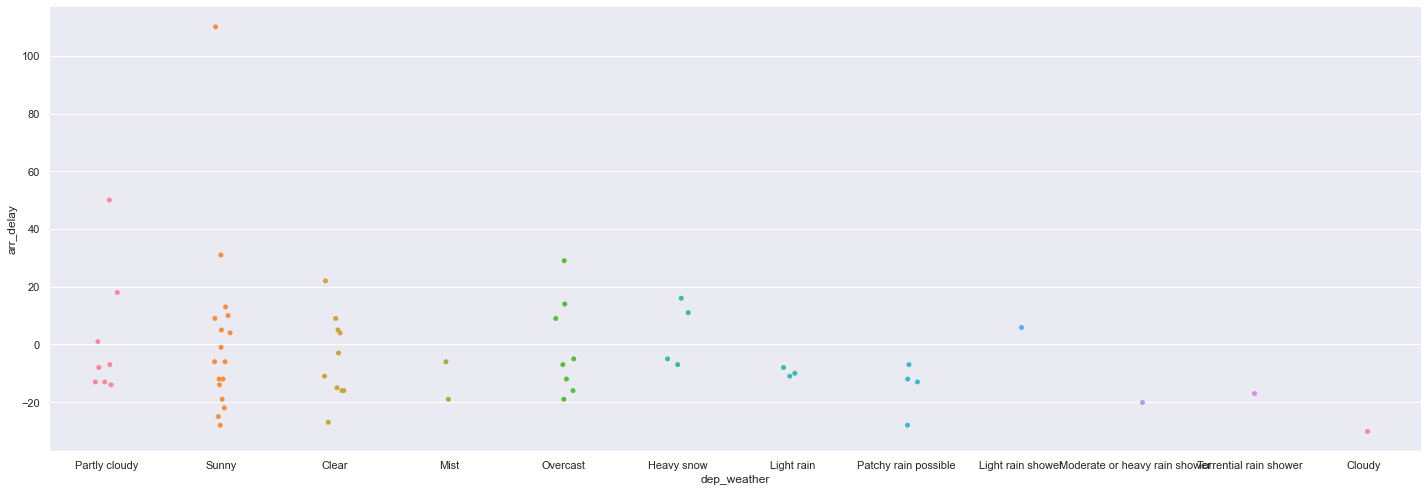

In [82]:
wdf = months[0].head()

for i in range(1,len(months)):
    wdf = wdf.append(months[i].head(), ignore_index=True)

    

sns.catplot(x="dep_weather", y="arr_delay", ax=ax, data=wdf, height=7, aspect=20/7)

In [130]:
# conds = wdf['dep_weather'].unique() 

# wdf[(wdf['dep_weather']==condition) & (wdf['arr_delay']>0)]['arr_delay'].count()

weather_count = Counter()

for condition in wdf['dep_weather'].unique():
    weather_count[condition] = wdf[(wdf['dep_weather']==condition) & (wdf['arr_delay']>0)]['arr_delay'].count()
    

for condition in wdf['dep_weather'].unique():
    print(condition,' percentage of delays: ', (weather_count[condition] / sum(weather_count.values()))*100, '%',sep='')

Partly cloudy percentage of delays: 15.0%
Sunny percentage of delays: 35.0%
Clear percentage of delays: 20.0%
Mist percentage of delays: 0.0%
Overcast percentage of delays: 15.0%
Heavy snow percentage of delays: 10.0%
Light rain percentage of delays: 0.0%
Patchy rain possible percentage of delays: 0.0%
Light rain shower percentage of delays: 5.0%
Moderate or heavy rain shower percentage of delays: 0.0%
Torrential rain shower percentage of delays: 0.0%
Cloudy percentage of delays: 0.0%


### ^^^ Looks like sunny weather has the most delays - interesting. Not much correllation between bad weather and arrival delay

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [30]:
for month in months:
    month['taxi_time'] = month['taxi_in'] + month['taxi_out']

month_df['taxi_time']

0      14.0
1      18.0
2      22.0
3      18.0
4      21.0
       ... 
295    11.0
296    18.0
297    17.0
298    13.0
299    53.0
Name: taxi_time, Length: 300, dtype: float64

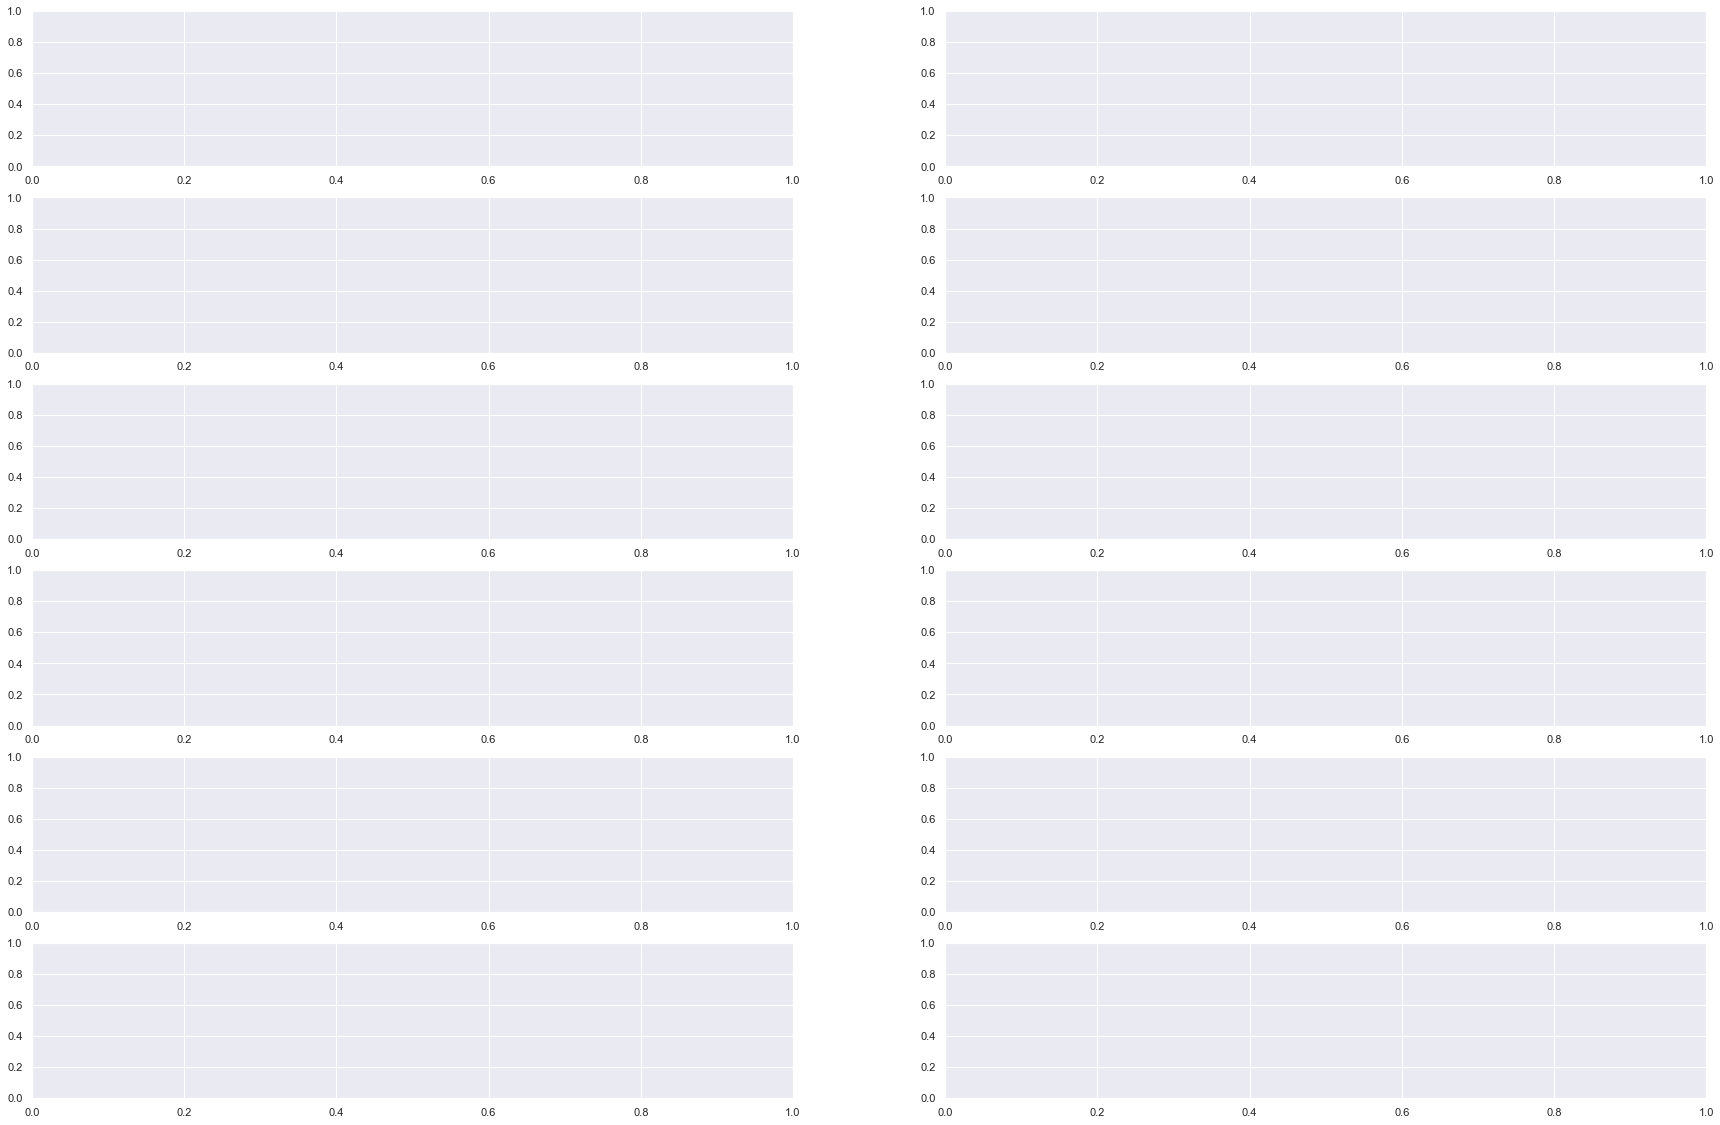

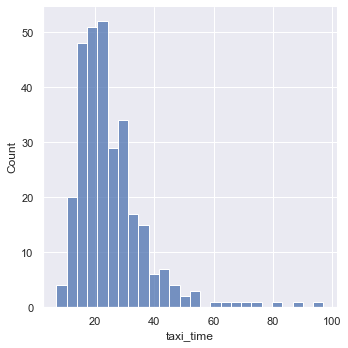

In [93]:
fig, axes = plt.subplots(nrows=6,ncols=2)

axes[0] = sns.displot(months[0]['taxi_time'], kind='hist', )

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [140]:
with_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] > 0)]['dep_delay'].count()
without_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] <= 0)]['dep_delay'].count()
total = (with_dep + without_dep)

arr_and_dep, only_arr, total


print('Percentage of arrival delays with departure delay:   ', (with_dep/total)*100)
print('Percentage of arrival delays without departure delay:', (without_dep/total)*100)

Percentage of arrival delays with departure delay:    66.0472972972973
Percentage of arrival delays without departure delay: 33.9527027027027


                                   No surprise here ^^^

#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
def get_region(IATA):
    

In [187]:
state_count = Counter()

for IATA in df['origin']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1
    
for IATA in df['dest']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1

In [188]:
del state_count['PR-U-A'] # Puerto Rico (unincorporated US territory)
del state_count['VI-U-A'] # US Virgin Islands (unincorporated US territory)
list(state_count.items())

[('US-IL', 83),
 ('US-NY', 101),
 ('US-PA', 138),
 ('US-TX', 171),
 ('US-FL', 257),
 ('US-IN', 12),
 ('US-CA', 332),
 ('US-CO', 43),
 ('US-NC', 256),
 ('US-AZ', 147),
 ('US-OR', 39),
 ('US-OK', 12),
 ('US-NV', 39),
 ('US-MI', 74),
 ('US-MA', 50),
 ('US-WA', 143),
 ('US-DC', 43),
 ('US-GA', 283),
 ('US-OH', 22),
 ('US-MO', 19),
 ('US-NE', 8),
 ('US-LA', 16),
 ('US-IA', 5),
 ('US-CT', 13),
 ('US-NJ', 23),
 ('US-WI', 15),
 ('US-TN', 24),
 ('US-UT', 47),
 ('US-RI', 4),
 ('US-MD', 19),
 ('US-SC', 28),
 ('US-NM', 9),
 ('US-VA', 20),
 ('US-MN', 121),
 ('US-ME', 1),
 ('US-KY', 15),
 ('US-WV', 3),
 ('US-VT', 4),
 ('US-AR', 5),
 ('US-AK', 160),
 ('US-HI', 12),
 ('US-AL', 4),
 ('US-MT', 3),
 ('US-MS', 2),
 ('US-ID', 2),
 ('US-ND', 1)]

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?